<a href="https://colab.research.google.com/github/jasmine-yolo/Python-practice/blob/main/P_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **decision tree**









In [1]:
import os
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
import IPython, graphviz, re, math
from sklearn.metrics import mean_squared_error as mse

In [37]:
#### calculate the feature importance by SHAP ####

# install SHAP 
!pip install shap

# import shap package
import shap

     |████████████████████████████████| 564 kB 4.3 MB/s 


In [2]:
from google.colab import drive

# mount the Google drive as a path that you can work on 
drive.mount('/drive')

df_0 = pd.read_csv('/drive/My Drive/Colab Notebooks/Data/smalldata.csv', parse_dates=['DATE'])

Mounted at /drive


In [3]:
df_0.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77836 entries, 0 to 77835
Data columns (total 102 columns):
 #    Column           Non-Null Count  Dtype         
---   ------           --------------  -----         
 0    Unnamed: 0       77836 non-null  float64       
 1    DATE             77836 non-null  datetime64[ns]
 2    permno           77836 non-null  float64       
 3    RET              77836 non-null  float64       
 4    mvel1            77836 non-null  float64       
 5    prc              77836 non-null  float64       
 6    SHROUT           77836 non-null  float64       
 7    beta             77836 non-null  float64       
 8    betasq           77836 non-null  float64       
 9    chmom            77836 non-null  float64       
 10   dolvol           77836 non-null  float64       
 11   idiovol          77836 non-null  float64       
 12   indmom           77836 non-null  float64       
 13   mom1m            77836 non-null  float64       
 14   mom6m            778

In [4]:
df=df_0.dropna(axis=0, how='any')

df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
#set DATE as index
df.set_index('DATE', inplace=True)
df.sort_values('DATE', inplace=True)

In [6]:
df['lead(RET,1)'] = df['RET'].shift(-1)
df.drop(columns=['RET'],inplace=True)
df.dropna(axis=0, how='any')

,permno,mvel1,prc,SHROUT,beta,betasq,chmom,dolvol,idiovol,indmom,...,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia,"lead(RET,1)"
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-29,86098.0,45513.75000,0.669900,60685.0,0.518872,0.269228,-1.809524,9.379499,0.100164,0.641103,...,6.470000e-07,0.078947,0.030867,0.804887,0.578704,1.060000e-07,73.0,1.053929,0.183501,-0.069613
2010-01-29,90605.0,289238.00610,16.840000,15980.0,1.050024,1.102549,-0.025749,11.245050,0.079708,0.084098,...,3.850000e-08,0.089895,0.026122,1.122120,2.418606,4.140000e-08,42.0,0.749266,-0.394330,-0.007468
2010-01-29,63706.0,283082.79300,30.570000,9191.0,0.975158,0.950933,-0.635084,11.253987,0.046256,0.399662,...,2.790000e-08,0.010859,0.011896,0.547069,0.702432,8.260000e-08,67.0,0.000287,-1.517140,0.000000
2010-01-29,38746.0,82145.19886,13.700000,5996.0,1.377299,1.896954,0.889446,9.486717,0.078316,0.663608,...,4.600000e-07,0.041451,0.015667,1.079481,0.788810,9.370000e-08,65.0,0.519059,-1.535083,0.014184
2010-01-29,89898.0,83790.65802,1.430000,63428.0,0.897917,0.806254,0.384356,10.968221,0.121274,0.135788,...,7.700000e-08,0.096552,0.029999,0.517723,2.077421,2.510000e-08,44.0,0.107389,-1.107860,-0.043571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,20123.0,294300.01260,10.360000,30000.0,1.023273,1.050486,-0.013411,13.170475,0.043093,-0.019531,...,8.350000e-09,0.014286,0.007723,1.616228,2.292756,1.550000e-07,55.0,0.587311,-0.129934,0.197354
2020-12-31,79150.0,537326.98920,45.259998,14215.0,1.121876,1.258605,0.547245,13.408118,0.067260,0.332163,...,8.250000e-09,0.092023,0.040739,0.477943,2.834439,1.640000e-08,28.0,0.587311,-0.129934,-0.054131
2020-12-31,17444.0,30115.79992,13.280000,2145.0,1.858005,3.452183,0.563742,8.835624,0.081825,0.317594,...,1.150000e-05,0.066762,0.031831,1.522927,0.888858,9.920000e-08,36.0,0.587311,-0.129934,0.103030


In [7]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
      df.drop(['lead(RET,1)'], axis=1),
      df.loc[:,['lead(RET,1)']],
      test_size=0.3, shuffle=False)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((54484, 99), (54484, 1), (23351, 99), (23351, 1))

In [9]:
model_tree = DecisionTreeRegressor()

In [10]:
%time model_tree.fit(X_train, y_train)

CPU times: user 15.3 s, sys: 0 ns, total: 15.3 s
Wall time: 15.2 s


DecisionTreeRegressor()

In [11]:
model_tree.get_depth()

100

In [12]:
### COMPUTE STOCHASTIC DROPOUT ###
%%time
#mse
msescores = []
for i in tqdm.tqdm(range(0,50)):
    msescores.append(mean_squared_error(y_train, model_tree.predict(X_train).ravel()))

#mae
maescores = []
for i in tqdm.tqdm(range(0,50)):
    maescores.append(mean_absolute_error(y_train, model_tree.predict(X_train).ravel()))

100%|██████████| 50/50 [00:03<00:00, 16.53it/s]

CPU times: user 5.91 s, sys: 0 ns, total: 5.91 s
Wall time: 5.8 s


In [13]:
print(np.mean(msescores),np.mean(maescores))

0.0 0.0


In [14]:
### COMPUTE STOCHASTIC DROPOUT ###
%%time
#mse
msescores = []
for i in tqdm.tqdm(range(0,50)):
    msescores.append(mean_squared_error(y_test, model_tree.predict(X_test).ravel()))

#mae
maescores = []
for i in tqdm.tqdm(range(0,50)):
    maescores.append(mean_absolute_error(y_test, model_tree.predict(X_test).ravel()))

100%|██████████| 50/50 [00:01<00:00, 39.43it/s]

CPU times: user 2.77 s, sys: 20.2 ms, total: 2.79 s
Wall time: 2.75 s


In [15]:
print(np.mean(msescores), np.mean(maescores))

0.06593531346678135 0.1647418838165389


存在过拟合问题，需要进行剪枝

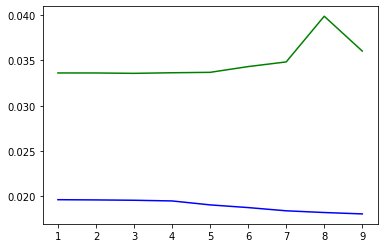

In [16]:
max_depths = range(1, 10)
training_error = []
testing_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(mse(y_train, model_1.predict(X_train)))
    testing_error.append(mse(y_test, model_1.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')

In [17]:
model_tree = DecisionTreeRegressor(max_depth=5)

In [18]:
%time model_tree.fit(X_train, y_train)

CPU times: user 1.94 s, sys: 277 µs, total: 1.94 s
Wall time: 1.92 s


DecisionTreeRegressor(max_depth=5)

In [19]:
### COMPUTE STOCHASTIC DROPOUT ###
%%time
#mse
msescores = []
for i in tqdm.tqdm(range(0,50)):
    msescores.append(mean_squared_error(y_train, model_tree.predict(X_train).ravel()))

#mae
maescores = []
for i in tqdm.tqdm(range(0,50)):
    maescores.append(mean_absolute_error(y_train, model_tree.predict(X_train).ravel()))

100%|██████████| 50/50 [00:00<00:00, 50.32it/s]

CPU times: user 2.07 s, sys: 25.8 ms, total: 2.1 s
Wall time: 2.07 s


In [20]:
print(np.mean(msescores),np.mean(maescores))

0.019038762876582686 0.0842413596893649


In [21]:
### COMPUTE STOCHASTIC DROPOUT ###
%%time
#mse
msescores = []
for i in tqdm.tqdm(range(0,50)):
    msescores.append(mean_squared_error(y_test, model_tree.predict(X_test).ravel()))

#mae
maescores = []
for i in tqdm.tqdm(range(0,50)):
    maescores.append(mean_absolute_error(y_test, model_tree.predict(X_test).ravel()))

100%|██████████| 50/50 [00:00<00:00, 111.39it/s]

CPU times: user 936 ms, sys: 13.9 ms, total: 950 ms
Wall time: 927 ms


In [22]:
print(np.mean(msescores), np.mean(maescores))

0.03368994063696524 0.10296186283292923


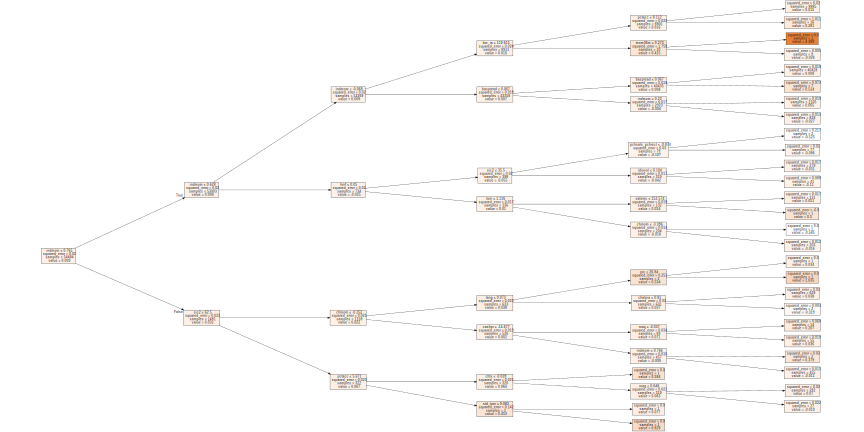

In [23]:
def draw_tree(t, col_names, size=12, ratio=0.5, precision=3):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=X_train.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}',s)))
col_names =X_train.columns
draw_tree(model_tree, col_names, precision=3)

# **Feature importance**

In [38]:
# define the explainer
# shap has many explainers, Kernelexplainer supports tensorflow NN model
explainer = shap.TreeExplainer(model_tree,X_train.iloc[:50,:])

# calculate the SHAP values for each feature using 300 rows, 
# you may use less for shorter calculation time
# this takes ~3 minutes
shap_values = explainer.shap_values(X_train.iloc[:300,:])

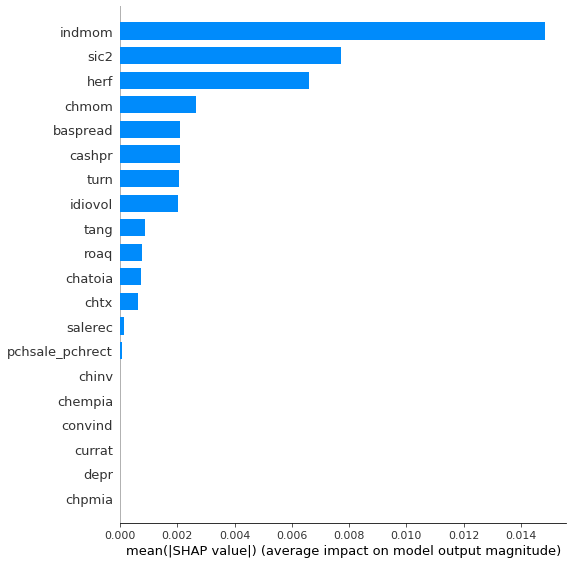

In [41]:
#### show some results ####

expected_value = explainer.expected_value

# visulize the feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# **interview questions**

**What is decision tree?**
  
Decision trees is a tool that uses a tree-like model of decisions and their possible consequences. If an algorithm only contains conditional control statements, decision trees can model that algorithm really well.
Decision trees are a non-parametric, supervised learning method.
Decision trees are used for classification and regression tasks.
The diagram below shows an example of a decision tree (the dataset used is the Titanic dataset to predict whether a passenger survived or not):

决策树是一种非参数的有监督学习方法，可以用于回归和分类。


